<a href="https://colab.research.google.com/github/allispaul/audiobot/blob/main/AG_FMAEDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FMA

## Information

tracks.csv - metadata on music

features.csv - features calculated by librosa and echonet for 30 second clips of songs





## FMA Metadata exploration

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [18]:
names=["track_id","artist_location","artist_name","split",
       "subset","track_bitrate","track_duration",
       "genre_top","genres","genres_all","track_interest","track_language",
       "track_listens","track_title"]
columns_to_read = [0,23,26,31,32,33,38,40,41,42,44,45,47,52]
tracks = pd.read_csv("tracks.csv",
                     names=names,
                     usecols=columns_to_read,
                     skiprows=3)

In [19]:
tracks.head()

,track_id,artist_location,artist_name,split,subset,track_bitrate,track_duration,genre_top,genres,genres_all,track_interest,track_language,track_listens,track_title
0,2,New Jersey,AWOL,training,small,256000,168,Hip-Hop,[21],[21],4656,en,1293,Food
1,3,New Jersey,AWOL,training,medium,256000,237,Hip-Hop,[21],[21],1470,en,514,Electric Ave
2,5,New Jersey,AWOL,training,small,256000,206,Hip-Hop,[21],[21],1933,en,1151,This World
3,10,NaN,Kurt Vile,training,small,192000,161,Pop,[10],[10],54881,en,50135,Freeway
4,20,Colchester England,Nicky Cook,training,large,256000,311,NaN,"[76, 103]","[17, 10, 76, 103]",978,en,361,Spiritual Level


In [27]:
# FMA Small

fma_small = tracks[tracks.subset=="small"]
fma_small.head()

# FMA medium
fma_medium = tracks[tracks.subset=="medium"]
fma_medium.head()

,track_id,artist_location,artist_name,split,subset,track_bitrate,track_duration,genre_top,genres,genres_all,track_interest,track_language,track_listens,track_title
1,3,New Jersey,AWOL,training,medium,256000,237,Hip-Hop,[21],[21],1470,en,514,Electric Ave
9,134,New Jersey,AWOL,training,medium,256000,207,Hip-Hop,[21],[21],1126,en,943,Street Music
11,136,NaN,Abominog,training,medium,256000,509,Rock,"[45, 58]","[58, 12, 45]",1948,en,1498,Peel Back The Mountain Sky
14,139,"Providence, RI",Alec K. Redfearn & the Eyesores,training,medium,128000,296,Folk,[17],[17],702,en,582,CandyAss
54,181,NaN,Ariel Pink's Haunted Graffiti,test,medium,256000,171,Rock,[27],"[27, 12]",1736,en,1339,Gopacapulco


### FMA Small

In [31]:
bitrate_counts = fma_small.track_bitrate.value_counts()
bitrate_counts

track_bitrate
320000    3704
256000    1460
192000    1042
128000     361
160000     238
          ... 
175915       1
200284       1
202320       1
167020       1
199711       1
Name: count, Length: 1178, dtype: int64

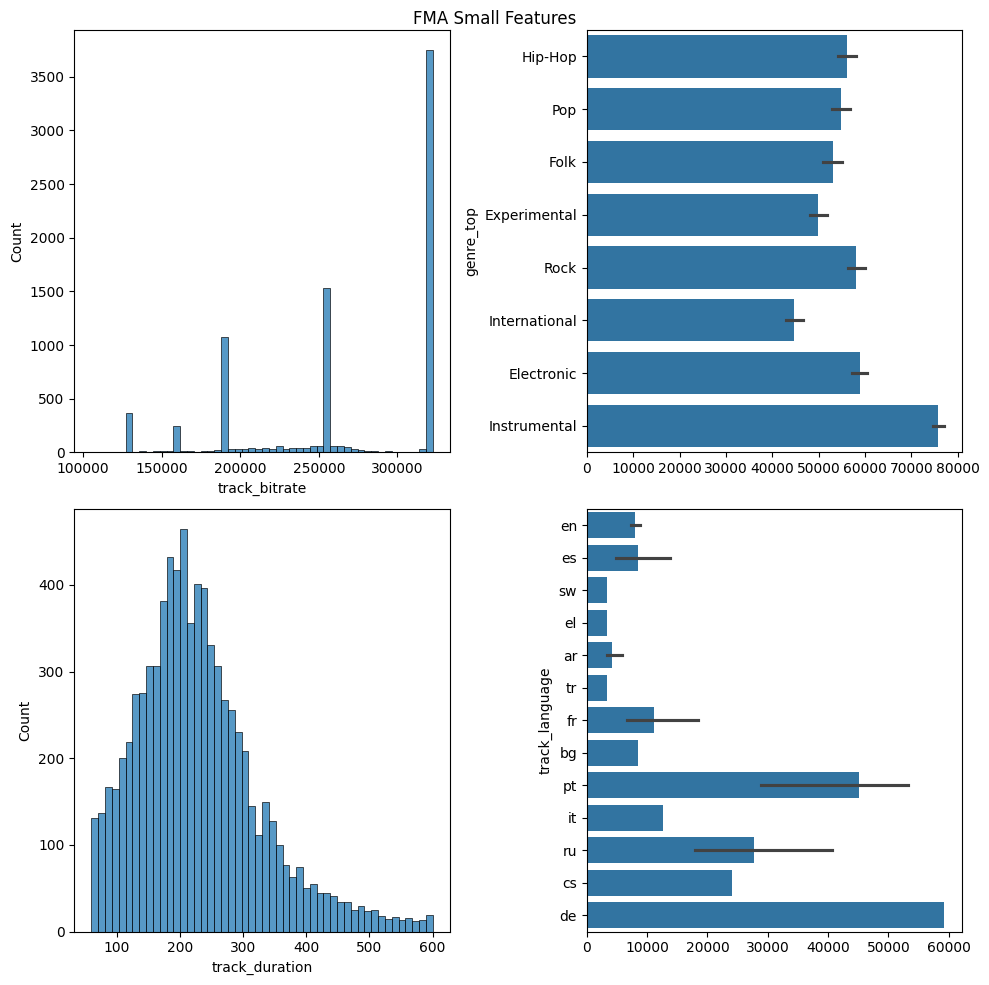

In [56]:
fig,ax = plt.subplots(2,2,
                      figsize=(10,10),
                      sharex=False,
                      sharey=False)

sns.histplot(data=fma_small,
             x="track_bitrate",
             bins=50,
             ax=ax[0,0])

sns.barplot(fma_small.genre_top
            , ax=ax[0,1])

sns.histplot(data=fma_small,
             x="track_duration",
             bins=50,
             ax=ax[1,0])

sns.barplot(fma_small.track_language
            , ax=ax[1,1])

plt.tight_layout()

fig.suptitle("FMA Small Features")
plt.subplots_adjust(top=0.96)

plt.show()


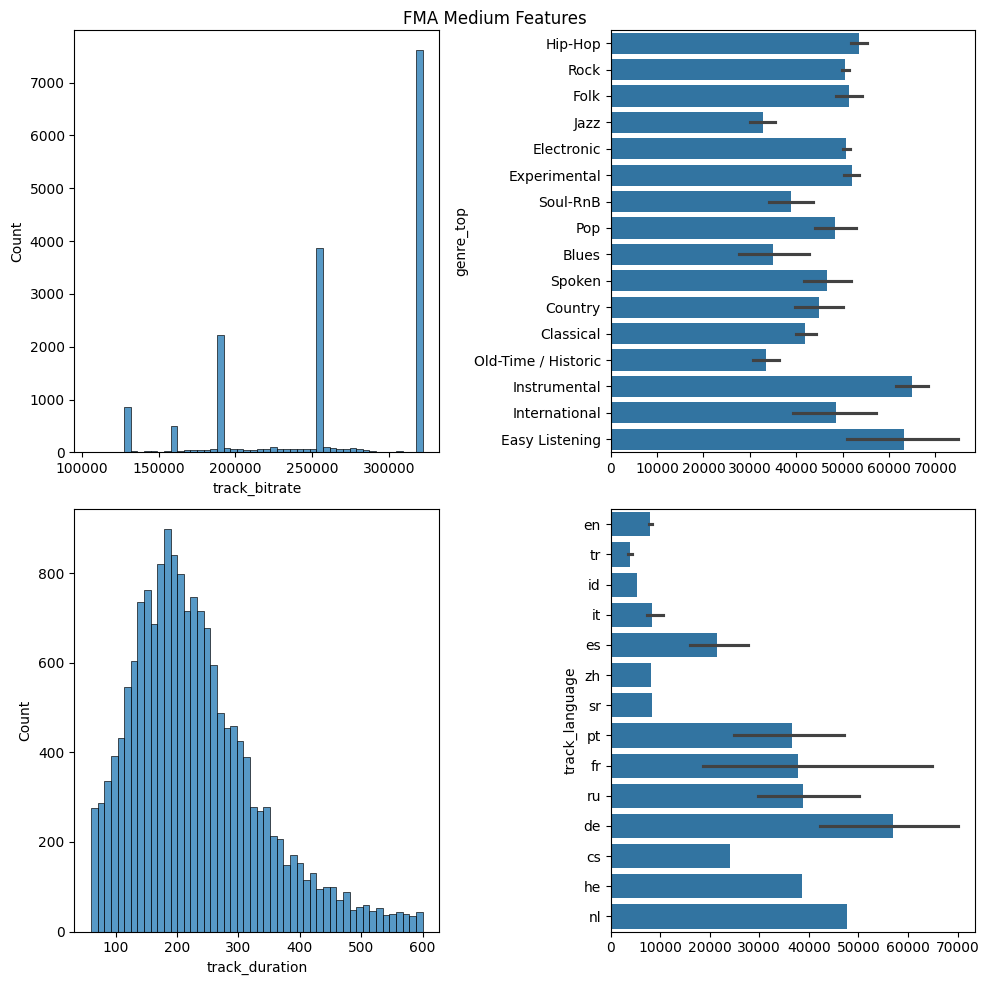

In [59]:
fig,ax = plt.subplots(2,2,
                      figsize=(10,10),
                      sharex=False,
                      sharey=False)

sns.histplot(data=fma_medium,
             x="track_bitrate",
             bins=50,
             ax=ax[0,0])

sns.barplot(fma_medium.genre_top
            , ax=ax[0,1])

sns.histplot(data=fma_medium,
             x="track_duration",
             bins=50,
             ax=ax[1,0])

sns.barplot(fma_medium.track_language
            , ax=ax[1,1])

plt.tight_layout()

fig.suptitle("FMA Medium Features")
plt.subplots_adjust(top=0.96)

plt.show()


## FMA-SMALL

This part will work with FMA small for EDA and feature extraction exploration.

